# Lecture 3 

## Visual encodings and plot configuration

## Lecture learning goals

By the end of the lecture you will be able to:

1. Choose effective visual encodings.
2. Visualize frequencies with bar plots.
3. Facet to explore more variables simultaneously.
4. Customize axes labels and scales.
5. Introduced to Exploratory Data Analysis

## Required readings

- [Section 1.4 - 1.8
in the book Data Visualization: A practical introduction by Kieran Healy](https://socviz.co/lookatdata.html#visual-tasks-and-decoding-graphs).

---

## Visual encoding channels

So far we have seen how to use points and lines to represent data visually.
In this lecture,
we will see how we can also use areas and bars,
but before diving in to the code,
let's talk about when it is appropriate to use a certain geometric mark
to graphically represent data.

As with many aspect,
the best way to learn is to experience 
rather than being told something.
So lets experience which visual encodings are the most effective.

In the images below,
try to estimate how many times bigger the big object is compared to the small one.

![](img/circle-comparison.png)

![](img/bar-comparison.png)

This example is from [Jeffrey Heer's PyData talk](https://www.youtube.com/watch?v=hsfWtPH2kDg),
a visualization researcher at the university of Washington
whose research group also created Altair.

In both cases the answer is seven times bigger.
Most people find it is much easier to compare the length or position of the bars
rather than the area of the circles.
And for the circles,
you also didn't really know
if you were supposed to compare the area or maybe the diameter.
Even if you got both these right yourself,
the fact that many people prefer one over the other 
means that in order for you to create effective visualizations
you need to know which visual channels are the easiest for humans to decode.
Luckily,
there has been plenty of research in this area,
which can be summarizes in this schematic:

![](img/visual-channels.png)

Position is by far the best
and therefore we should put our most important comparison there.
Using position often means that we can't use other things such as length 
or angle (like the angle in a pie chart),
but we can add size or color to represent other relationships.
Even if it is hard to tell exact information from these
(is this color/dot 2x darker/bigger than another?)
they are good to give and idea of trends in the data
(are these dots darker/bigger than the others?

The biggest issues with using 3D is when it is usd unnecessarily (like a 3D bar or pie chart),
as the only way to compare position (like a 3D scatter plot),
and when they are represented on a 2D medium like a paper where they can't be rotated.
Sometimes 3D can be useful, like a topographical map or a protein folding visualization.
But be cautious,
we saw above that even in naturally 3D systems like blood vessels
it is still mentally more complex when they are 3D.
[Claus Wilke's has a good chapter](https://clauswilke.com/dataviz/no-3d.html) on this 
if you are interested to read more.
There is also some [interesting work done with the Rayshader library](https://www.tylermw.com/3d-ggplots-with-rayshader/)
that maps 3D in an intuitive way and incorporates reasonable camera rotation around the objects.
Below is an example of visualizing the bend in space time without the need for an additional 2D plot.

![](https://media.github.ubc.ca/user/1751/files/da4e1b00-0fd3-11eb-940d-0b06a28a0186)

Like with many things,
there are situation where you can override these guidelines 
if you are sure about what you are doing
and trying create a specific effect in your communication.
But most times, 
it is best to adhere to these principles.
To learn more about this topic,
please go ahead and read [Section 1.4 - 1.8
in the book Data Visualization: A practical introduction by Kieran Healy](https://socviz.co/lookatdata.html#visual-tasks-and-decoding-graphs).
He also shows some of the research underlying these concepts.
Once you have finished reading,
continue below.

So far we have learned about position, size, color, and shape (for categoricals)
with the line and point plots.
Let's see how area and barplots
use area, length, and position to compare objects.

## Global Development Data

We will be visualizing global health and population data for a number of countries.
This is the same data we're working with in lab 1.
We will be looking at many different data sets later,
but we're sticking to a familiar one for now
so that we can focus on laying a solid understanding of the visualization principles
with data we already know.

In [2]:
import altair as alt
import pandas as pd

# This is a setup cell so that Python and R can run in the same Jupyter notebook
# and so that the text of plots is bigger by default.
import altair as alt

# Set a bigger default font size for plots
def bigger_font():
    return {
        'config': {
            'view': {'continuousWidth': 400, 'continuousHeight': 300},
            'legend': {'symbolSize': 14, 'titleFontSize': 14, 'labelFontSize': 14}, 
            'axis': {'titleFontSize': 15, 'labelFontSize': 12}}}
alt.themes.register('bigger_font', bigger_font)
alt.themes.enable('bigger_font')

# Ensure that altair plots show up in the exported HTML
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the extension so that we can use the %%R cell magic
%load_ext rpy2.ipython

In [10]:
%%R
options(tidyverse.quiet = TRUE) 
library(tidyverse)

theme_set(theme_light(base_size = 18))

In [11]:
url = 'https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv'
gm = pd.read_csv(url)
gm

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
1,Afghanistan,1801,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
2,Afghanistan,1802,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
3,Afghanistan,1803,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
4,Afghanistan,1804,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38977,Zimbabwe,2014,15400000,Africa,Sub-Saharan Africa,Low,57.0,1910,3.90,64.3,39.8,0.78,10.9,10.0
38978,Zimbabwe,2015,15800000,Africa,Sub-Saharan Africa,Low,58.3,1890,3.84,59.9,40.8,NaN,11.1,10.2
38979,Zimbabwe,2016,16200000,Africa,Sub-Saharan Africa,Low,59.3,1860,3.76,56.4,41.7,NaN,NaN,NaN
38980,Zimbabwe,2017,16500000,Africa,Sub-Saharan Africa,Low,59.8,1910,3.68,56.8,42.7,NaN,NaN,NaN


`.info()` is a good method to get an overview in addition to printing the data as above.
It shows us the column types and if there are any `NaNs` (null values).

In [12]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                38982 non-null  object 
 1   year                   38982 non-null  int64  
 2   population             38982 non-null  int64  
 3   region                 38982 non-null  object 
 4   sub_region             38982 non-null  object 
 5   income_group           38982 non-null  object 
 6   life_expectancy        38982 non-null  float64
 7   income                 38982 non-null  int64  
 8   children_per_woman     38982 non-null  float64
 9   child_mortality        38980 non-null  float64
 10  pop_density            12282 non-null  float64
 11  co2_per_capita         16285 non-null  float64
 12  years_in_school_men    8188 non-null   float64
 13  years_in_school_women  8188 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 4.2+ 

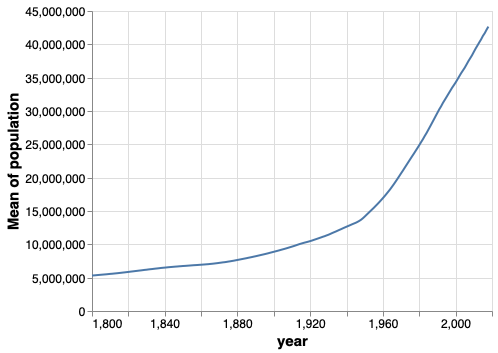

In [13]:
alt.Chart(gm).mark_line().encode(
    x='year',
    y='mean(population)')

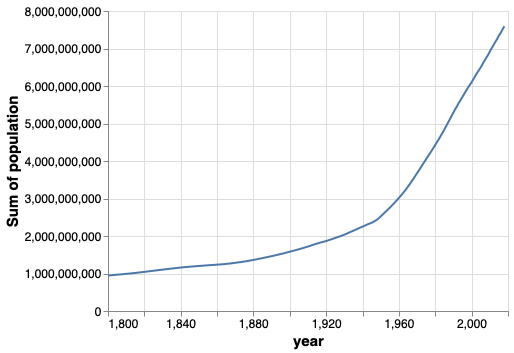

In [14]:
alt.Chart(gm).mark_line().encode(
    x='year',
    y='sum(population)')

Since we didn't parse "year" as dates when we loaded the data,
the x-axis looks weird.
Let's convert it to dates using the pandas function `to_datetime`.

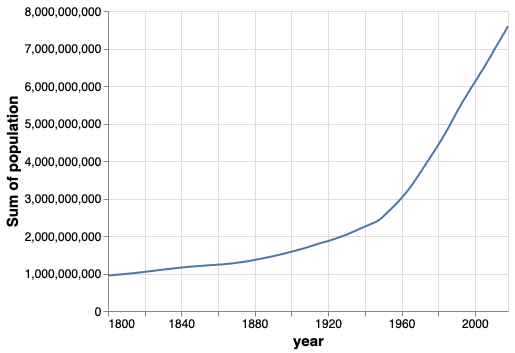

In [15]:
gm['year'] = pd.to_datetime(gm['year'], format='%Y')

alt.Chart(gm).mark_line().encode(
    x='year',
    y='sum(population)')

That looks better,
let's group by region.

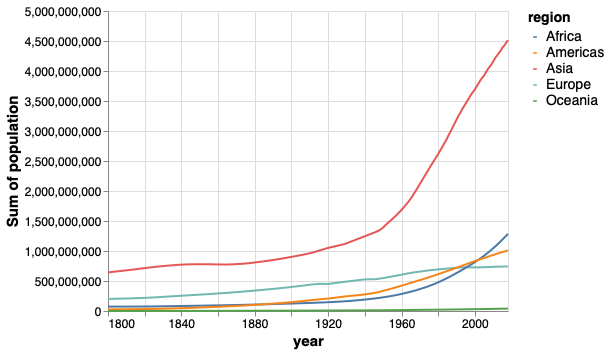

In [16]:
alt.Chart(gm).mark_line().encode(
    x='year',
    y='sum(population)',
    color='region')

The lines make it easy to compare regions against each other,
but hard to see overall population since that requires adding them mentally.

A stacked area chart can clearly show the total population while still giving a good indication of how each region contributes to it. 

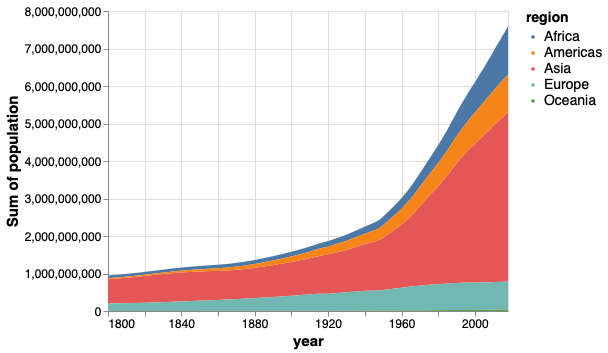

In [17]:
alt.Chart(gm).mark_area().encode(
    x='year',
    y='sum(population)',
    color='region')

Let's see how this looks in R.

In [18]:
%%R
url = 'https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv'
gm = read_csv(url)
glimpse(gm)

R[write to console]: Parsed with column specification:
cols(
  country = col_character(),
  year = col_double(),
  population = col_double(),
  region = col_character(),
  sub_region = col_character(),
  income_group = col_character(),
  life_expectancy = col_double(),
  income = col_double(),
  children_per_woman = col_double(),
  child_mortality = col_double(),
  pop_density = col_double(),
  co2_per_capita = col_double(),
  years_in_school_men = col_double(),
  years_in_school_women = col_double()
)



Rows: 38,982
Columns: 14
$ country               <chr> "Afghanistan", "Afghanistan", "Afghanistan", "A…
$ year                  <dbl> 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807,…
$ population            <dbl> 3280000, 3280000, 3280000, 3280000, 3280000, 32…
$ region                <chr> "Asia", "Asia", "Asia", "Asia", "Asia", "Asia",…
$ sub_region            <chr> "Southern Asia", "Southern Asia", "Southern Asi…
$ income_group          <chr> "Low", "Low", "Low", "Low", "Low", "Low", "Low"…
$ life_expectancy       <dbl> 28.2, 28.2, 28.2, 28.2, 28.2, 28.2, 28.1, 28.1,…
$ income                <dbl> 603, 603, 603, 603, 603, 603, 603, 603, 603, 60…
$ children_per_woman    <dbl> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,…
$ child_mortality       <dbl> 469, 469, 469, 469, 469, 469, 470, 470, 470, 47…
$ pop_density           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ co2_per_capita        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ years_in_school_men   <db

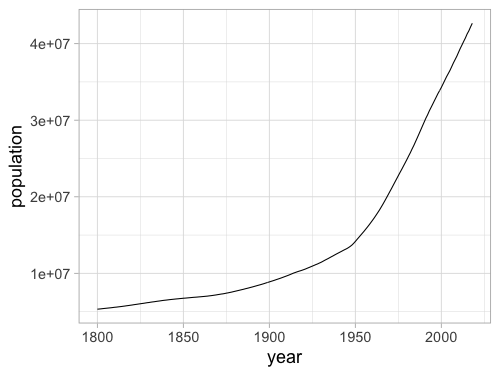

In [19]:
%%R -w 500 -h 375
ggplot(gm, aes(x = year, y = population)) +
       geom_line(stat = 'summary', fun = mean)

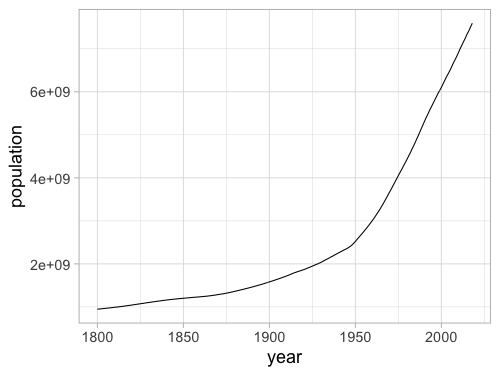

In [20]:
%%R -w 500 -h 375
ggplot(gm, aes(x = year, y = population)) +
       geom_line(stat = 'summary', fun = sum)

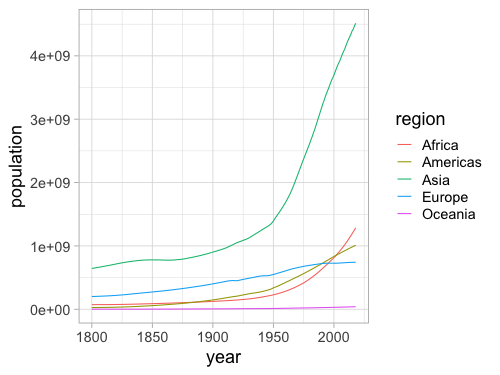

In [21]:
%%R -w 500 -h 375
ggplot(gm, aes(x = year, y = population, color = region)) +
       geom_line(stat = 'summary', fun = sum)

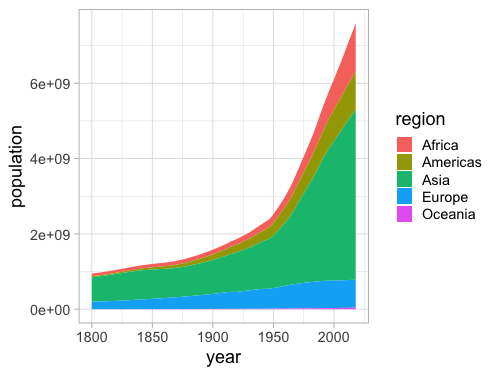

In [22]:
%%R -w 500 -h 375
ggplot(gm, aes(x = year, y = population, fill = region)) +
       geom_area(stat = 'summary', fun = sum)

# If you want to use `stat_summary` instead,
# you need to set `position = 'stack'` as I mentiond in the lab.
# I think using the geom-approach above is cleaner though.
    # stat_summary(fun=sum, geom='area', position='stack')


## Bar charts

Bar charts are often avoided when showing the mean of something
because they hide any variation,
something we will talk more about later.
But they are fine for showing statistics
such as sums and counts, or individual values
(e.g. the number of people in a country for a specific year).

In [23]:
# Subset the data that we will use
# Note that you can type just the year part 
# of a date as a string instead of typing out 
# the entire line 2018-01-01
gm2018 = gm[gm['year'] == '2018']

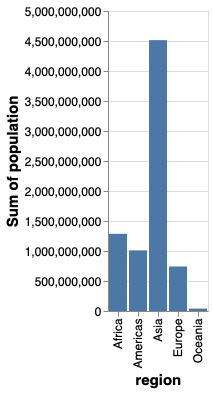

In [24]:
alt.Chart(gm2018).mark_bar().encode(
    x='region',
    y='sum(population)')

If we switched x and y,
we would create a horizontal bar chart instead.

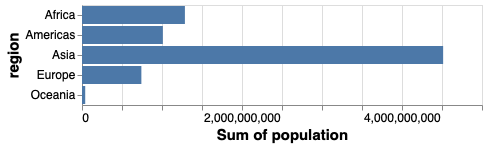

In [25]:
alt.Chart(gm2018).mark_bar().encode(
    y='region',
    x='sum(population)')

To count values,
we can use the statistical function `count()`.
We don't need to specify a column name for the y-axis,
since we are just counting values in each categorical on the x-axis.

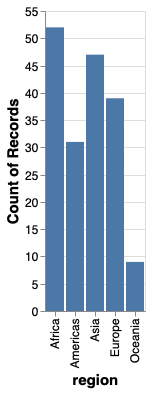

In [26]:
alt.Chart(gm2018).mark_bar().encode(
    x='region',
    y='count()')

Unless the x-axis has a natural order to it,
it is best to sort by value.
in order to do this,
we will use the helper functions `alt.X` and `alt.Y`.
These have the role of customizing things like order, bins, and scale for the axis
and avoids having dedicated extra functions just for this.
When using just `x='column'`, 
we're still calling `alt.X()` under the hood.

First let's use them on their own without any additional argument
to create the same plot as above.

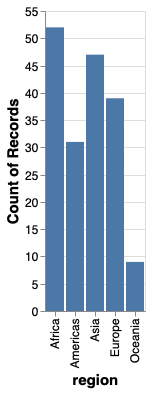

In [27]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('region'),
    y='count()')

We could even skip the `x=` part when using `alt.X`, 
but I am leaving it in for clarity.
Now we can add the sorting
of x based on its y-value.

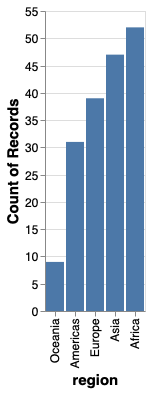

In [28]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('region', sort='y'),
    y='count()')

It is often more visually appealing with the longest bar
the closet to the axis,
so let's sort in reverse,
by using the minus sign.

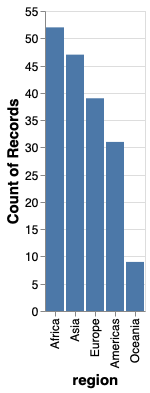

In [29]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('region', sort='-y'),
    y='count()')

To learn more about good consideration when plotting counts of observations,
you can refer to [chapter 6 of Fundamental of Data Visualizations](https://clauswilke.com/dataviz/visualizing-amounts.html).

### Bar charts in ggplot

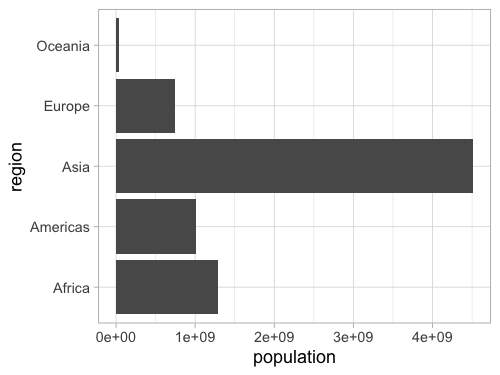

In [31]:
%%R -w 500 -h 375
gm2018 <- gm %>% filter(year == 2018)

ggplot(gm2018, aes(y = region, x = population)) +
    geom_bar(stat = 'summary', fun = sum)

Flip x and y for a vertical chart (less preferred, as it's easier (generally) to read labels on the y axis).

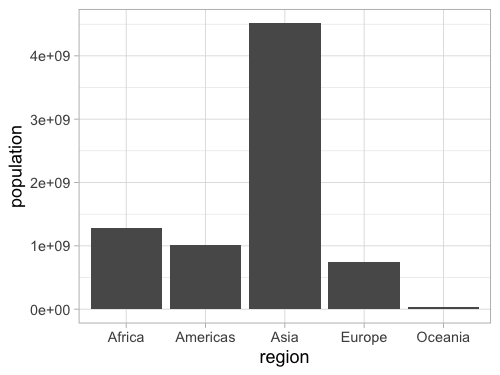

In [33]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = region, y = population)) +
    geom_bar(stat = 'summary', fun = sum)

Remove `y` when counting
and use the `'count'` stat instead of `'summary'`.
Since there is only one way of counting
we don't need to specify a function
(there are many ways of summarizing: mean, median, sum, sd, etc).

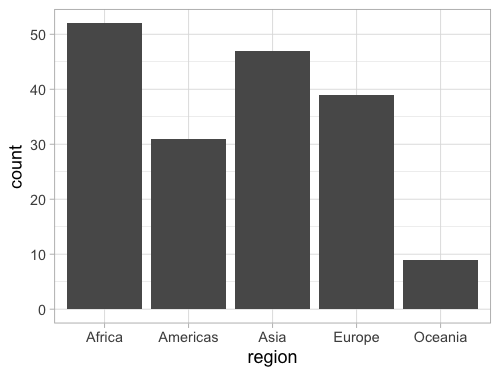

In [35]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = region)) +
    geom_bar(stat = 'count')

ggplot discourages people from using bars for summaries,
so the default `stat` is actually `'count'`,
which means we can leave it blank.

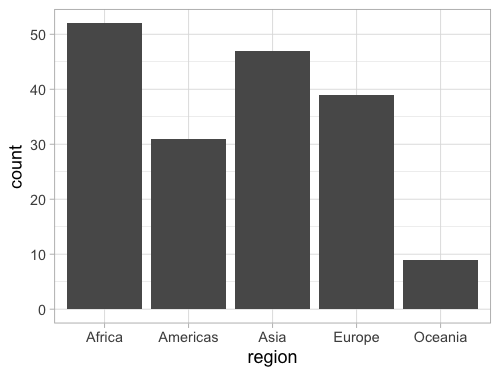

In [36]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = region)) +
    geom_bar()

It is easy to reorder a column based on another existing column in ggplot,
but it is a little bit tricky to do it based on a non-existing column,
such as the count so we need to create a column for the count first.

`add_count` creates a column named `n`,
that we can then pass to the base R `reorder` function
as the sorting key for our x-axis column:

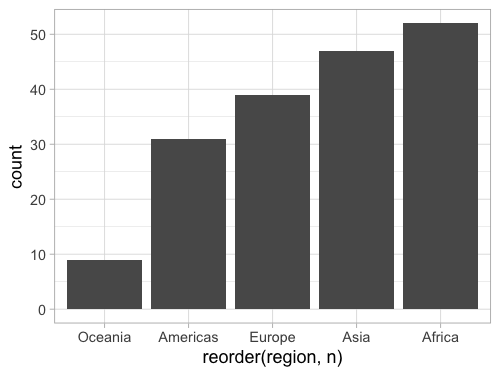

In [37]:
%%R -w 500 -h 375
gm2018 %>%
    add_count(region) %>%
       ggplot(aes(x = reorder(region, n))) +
        geom_bar()

Reversing a source is done wih the minus sign like in Altair.

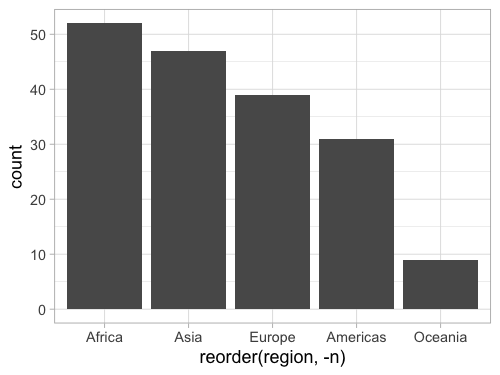

In [38]:
%%R -w 500 -h 375
gm2018 %>%
    add_count(region) %>%
       ggplot(aes(x = reorder(region, -n))) +
        geom_bar()

## Histograms

To make a bar chart of counts for a quantitative/numerical value
does not look that great by default:


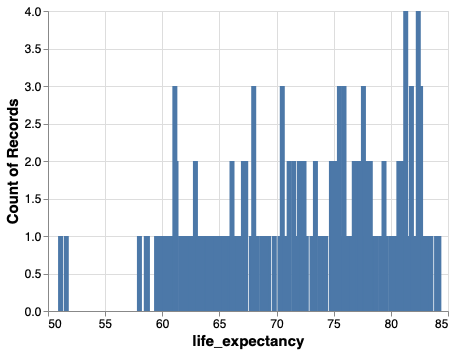

In [39]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy'),
    y='count()')

This is because there are very few values that are exactly the same,
(e.g 69.3, 70.1, etc).
We can see this by using the handy interactive `tooltip`
encoding in Altair
while hovering over the bars

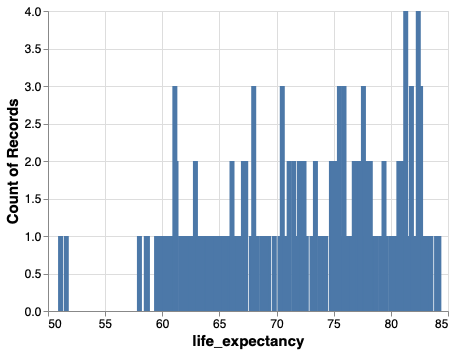

In [40]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy'),
    y='count()',
    tooltip='life_expectancy')

To fix this issue,
we can create bins on the x-axis and count all those values together.
This is a special case of a bar chart that is so common it has it's own name:
histogram.

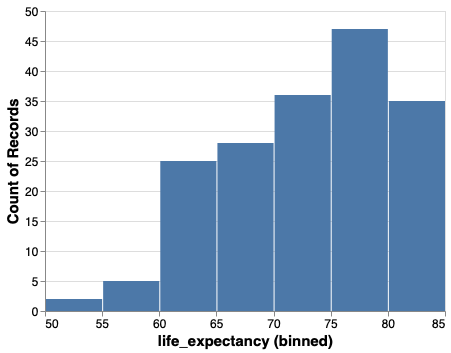

In [41]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=True),
    y='count()')

We could bin the tooltip the same way.
Altair is very consistent,
so when you learn the building blocks,
you can use them in many places.

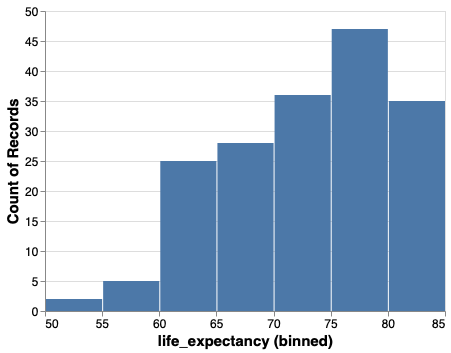

In [43]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=True),
    y='count()',
    tooltip=alt.Tooltip('life_expectancy', bin=True))

We can change the number of bins with `alt.Bin`.

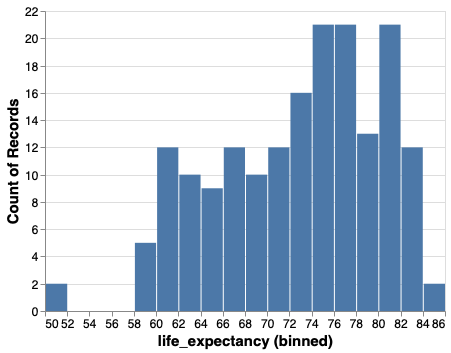

In [44]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=alt.Bin(maxbins=30)),
    y='count()')

### Histograms in ggplot

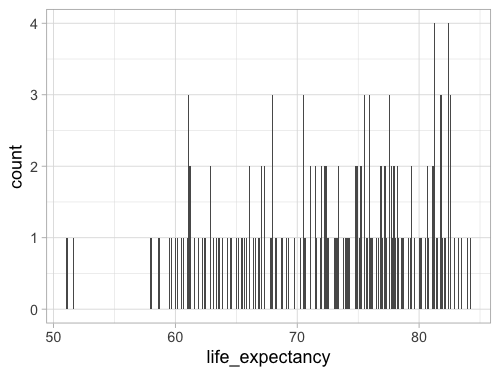

In [45]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_bar()

We can change the `stat` from the default `'count'`
to `'bin``.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



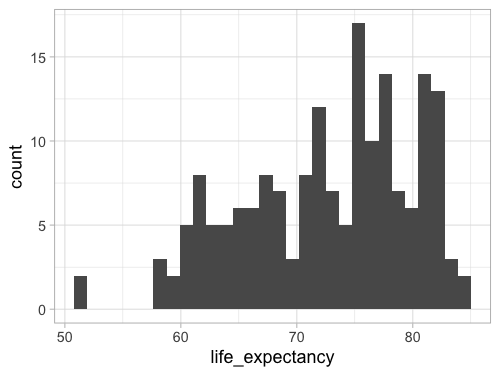

In [46]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_bar(stat = 'bin')

Since this is so common,
there is a shortcut: `geom_histogram`.
This geom calls `geom_bar(stat = 'bin')` by default,
so the output will be exactly the same.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



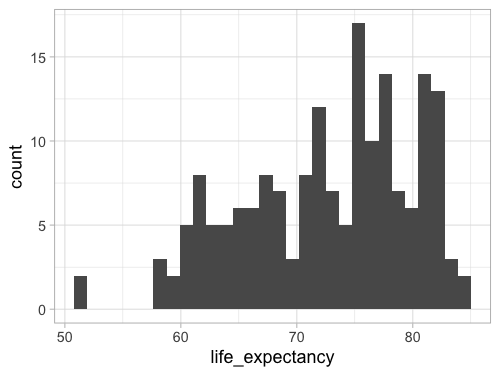

In [47]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_histogram()

Using `geom_histogram` is a bit more common,
so that is what I will use in the lecture notes,
but please remember that there is nothing magical with this function.
It is just `geom_bar` with a different default argument to `stat`.

Instead of setting binwidth as suggested,
we can use `bins` to set the number of bins,
which is more similar to `maxbins` in Altair.

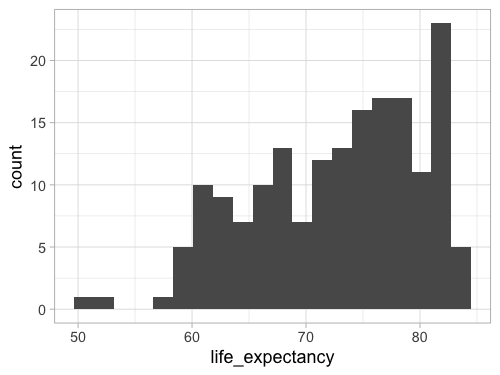

In [48]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_histogram(bins = 20)

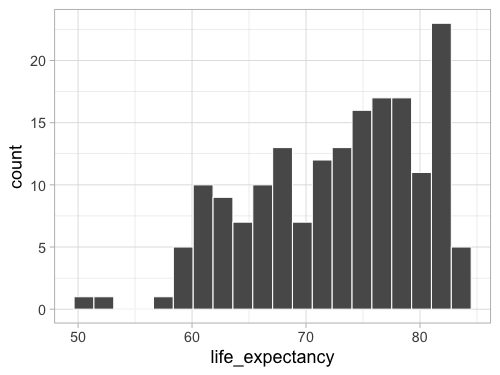

In [49]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_histogram(bins = 20, color = 'white')

## Facets

To condition the distributions on another variable we could use `color`.
However this becomes messy and it is hard to compare bars that are on different baselines.

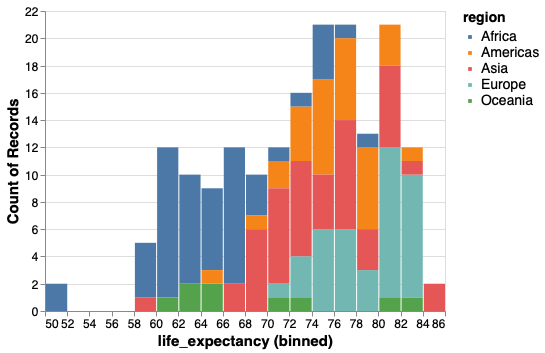

In [50]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='region')

It is better to use the position visual encoding to separate bars into subplots,
or facets.

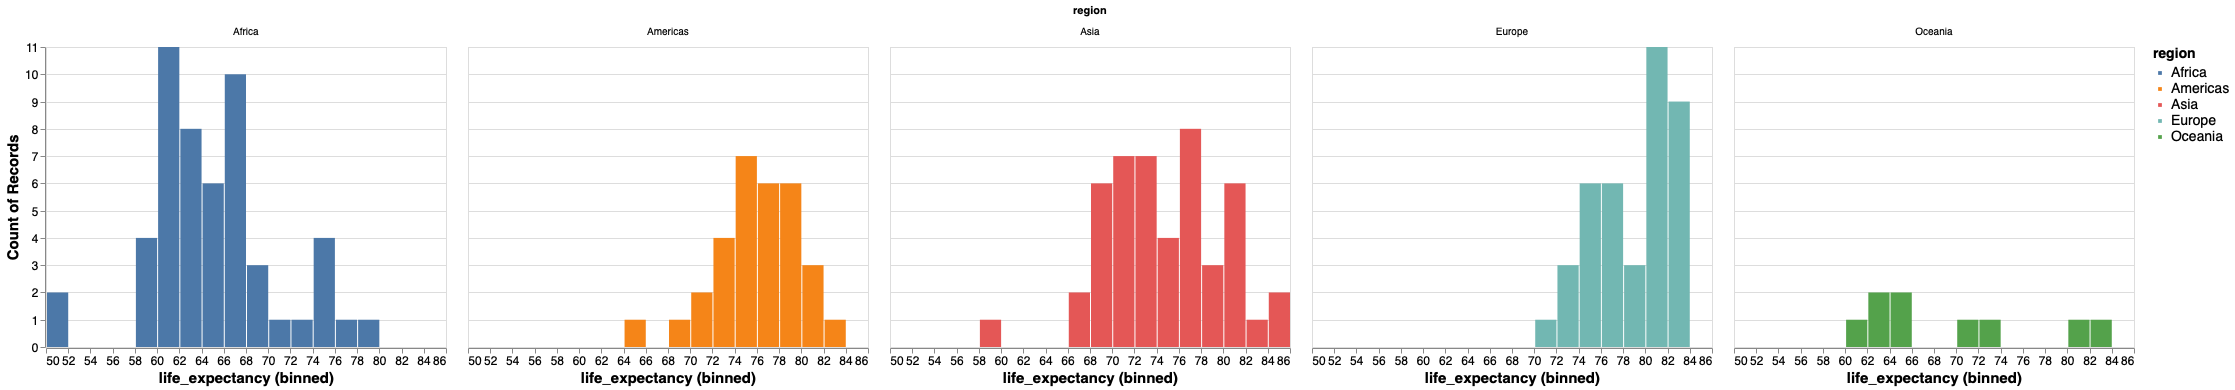

In [51]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='region').facet('region')

We could also use `column` and `row` inside `encode` for facetting,
but `.facet()` is more versatile as it works on top of layered charts.

Let's change the number of columns.

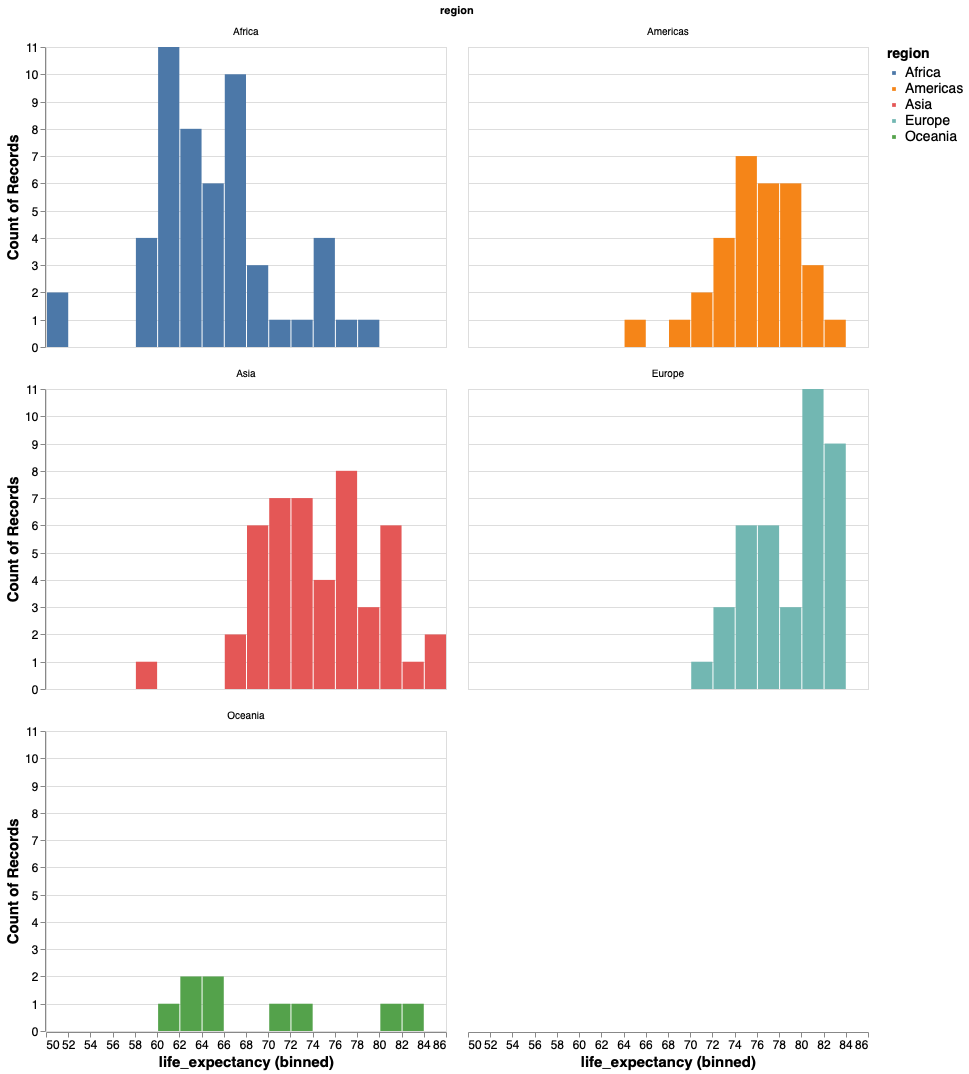

In [52]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='region'
).facet('region', columns=2)

And the size of each plot so that it is easier to see.

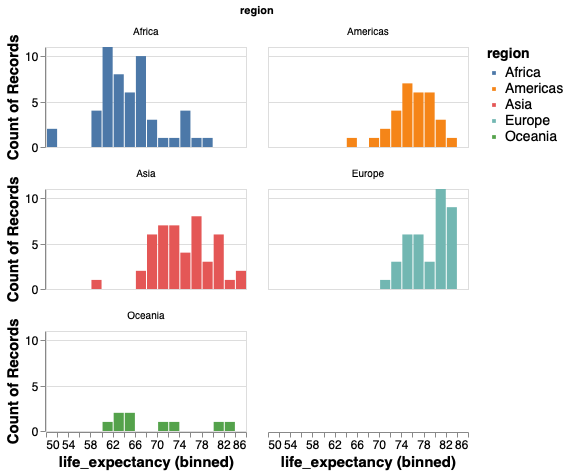

In [53]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='region'
).properties(width=200, height=100
).facet('region', columns=2
)

### Facetting in ggplot

When coloring bars and areas in ggplot,
we need to use `fill` instead of `color`.

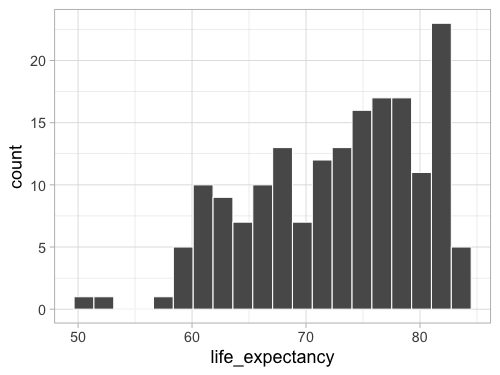

In [54]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy, color = region)) +
    geom_histogram(bins = 20, color = 'white')

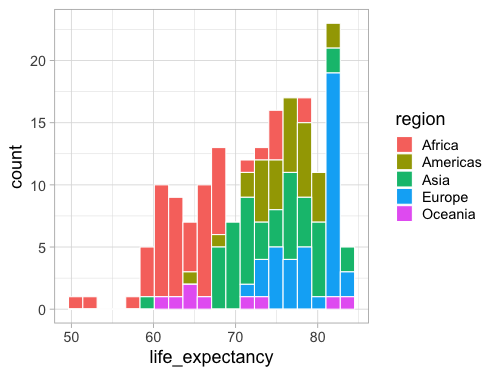

In [55]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy, fill = region)) +
    geom_histogram(bins = 20, color = 'white')

Facetting works via `facet_wrap`. 
By default it tries to create an even num of cols and rows,
rather than putting all plot in one row like Altair.

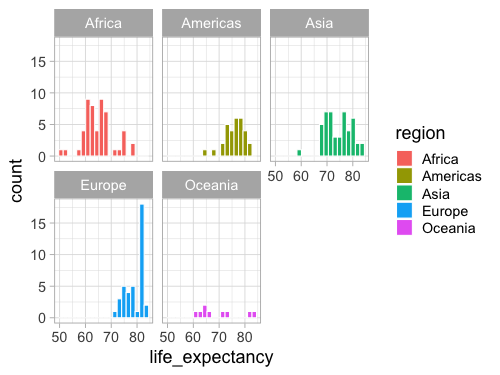

In [56]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy, fill = region)) +
    geom_histogram(bins = 20, color = 'white') +
    facet_wrap(~region)

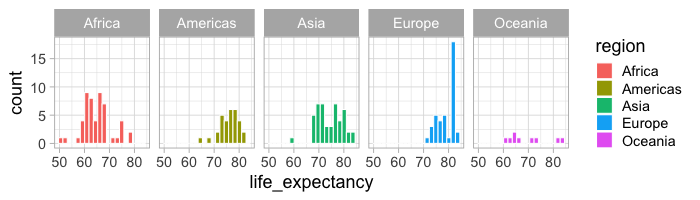

In [57]:
%%R -w 700 -h 200
ggplot(gm2018, aes(x = life_expectancy, fill = region)) +
    geom_histogram(bins = 20, color = 'white') +
    facet_wrap(~region, ncol = 5)

## Plot configuration

The figure below shows how you can change the appearance of a plot.
The comments in the code indicated what each line does.
Note how all the different parameters are set with the same function `alt.Scale()`,
which can be applied to any scale (x, y, size, color, etc).
You don't have to learn different functions for these tasks.

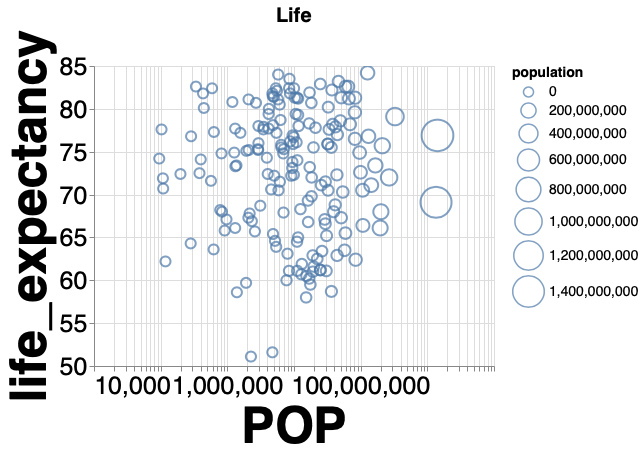

In [58]:
(alt.Chart(gm2018, title='Life').mark_point().encode(               # Change the title of the plot
    alt.X('population', scale=alt.Scale(type='log'), title='POP'),  # Change the x-axis scale to log and the title to 'POP'
    alt.Y('life_expectancy', scale=alt.Scale(zero=False)),          # Change the y-axis scale to not include zero
    alt.Size('population', scale=alt.Scale(range=(100, 1000))),     # Change the range of the size scale to enlarge points
    alt.Tooltip('country'))                                         # Att country on hover
.configure_axis(labelFontSize=25, titleFontSize=50)                 # Change axes title and label font sizes
.configure_title(fontSize=20)                                       # Change plot title font size
.configure_legend(titleFontSize=14)                                 # Change legend font size
.interactive())                                                     # Enable zooming and panning

With ggplot,
the functions have slightly different names 
and are all added to the end rather than to the different axes.

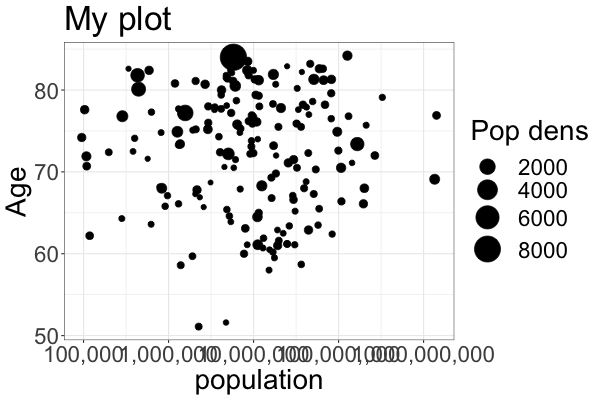

In [59]:
%%R -w 600 -h 400

ggplot(gm2018, aes(x = population, y = life_expectancy, size = pop_density)) +
    geom_point() +
    scale_x_log10(labels = scales::comma) + # Change the x-axis scale to log and supress scientific notation
    scale_size(range = c(2, 12)) +          # Change the range of the size scale to enlarge points
    ylab('Age') +                           # Change the x-axis scale to log and the title to 'POP'
    ggtitle('My plot') +                    # Change the title of the plot
    labs(size = 'Pop dens') +               # Change legend title
    theme_bw() +                            # Change the theme to black and white
    theme(text =  element_text(size = 28))  # Change the text size of all labels